In [1]:
import transformers
from matplotlib import pyplot as plt
import pandas as pd
from transformers import pipeline

In [2]:
data = pd.read_csv("/home/ajrfhp/nlp/subreddit-comments-dl/data/RedDevils/20220710122342/comments/1.csv")
data.head()

,id,submission_id,body,created_utc,parent_id,permalink
0,ieh80s1,vp6h0i,Did we see this kind of training video during ...,1656697457,t3_vp6h0i,/r/reddevils/comments/vp6h0i/on_the_ball_in_pr...
1,ieh8cat,vp6j94,nothing article really,1656697585,t3_vp6j94,/r/reddevils/comments/vp6j94/chelsea_tier_2_fr...
2,ieh8ajz,vp6j94,Could. If.\n\nYawn.\n\nAbsolute non story.,1656697565,t3_vp6j94,/r/reddevils/comments/vp6j94/chelsea_tier_2_fr...
3,ieh8g9g,vp6j94,Only if we bottle the signing.\n\nThey're not ...,1656697629,t3_vp6j94,/r/reddevils/comments/vp6j94/chelsea_tier_2_fr...
4,ieh89my,vp6j94,New Chelsea is extremely incompetent at transf...,1656697555,t3_vp6j94,/r/reddevils/comments/vp6j94/chelsea_tier_2_fr...


In [7]:
classifier = pipeline(task='text-classification', model='')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

nothing article really -0.9991540908813477
Could. If.\n\nYawn.\n\nAbsolute non story. -0.9983155727386475
Only if we bottle the signing.\n\nThey're not entering the race yet. Easy everyone. -0.9975358247756958
New Chelsea is extremely incompetent at transfers, nothing to worry about 0.900814414024353
Fuckers have Jorgino, Kova, Kante, Mount...can they let us have this one -0.9985288381576538
Don't you dare do an obi mikel on him -0.986770510673523
Just monitoring so can relax, for now 0.9088127613067627
Chelsea you don't cheebye 0.6896841526031494
Not worried. He’s our number 1 target, he’s open to the move and we have ETH. Genuinely not worried and neither should you lot be. Also, Chelsea are literally being linked to every player that’s played football, it’s easy clicks. I sense bullshit. 0.6221874356269836
Broke barca just gazumped chelsea back for raphinha they’re absolutely seething lmao 0.6822405457496643
I'm fucking scared...\n\nChelsea usually don't mess around with transfers 0

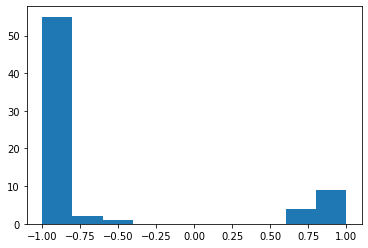

In [53]:
def get_sentiment_against_topic(data, topic='', num_comments = 1000, num_visualize_pos=5, num_visualize_neg=5):
    topic_comments = data[data['permalink'].str.contains(topic)]['body']
    scores = []
    for i, comment in enumerate(topic_comments.values[:num_comments]):
        try:
            if len(comment) < 512:
                classification = classifier(comment)[0]
                score = classification['score']
                if classification['label'] == "NEGATIVE":
                    score *= -1
                    if num_visualize_neg > 0:
                        print(comment, score)
                        num_visualize_neg -= 1
                else:
                    if num_visualize_pos > 0:
                        print(comment, score)
                        num_visualize_pos = 1
                scores.append(score)
                
        except:
            print(f"Invalid {comment}")
    plt.hist(scores)
    plt.show()
get_sentiment_against_topic(data, topic='frenkie')

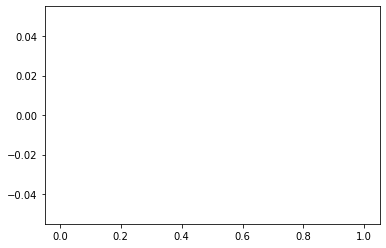

In [52]:
get_sentiment_against_topic(data, topic='pogba')